## THE SPARKS FOUNDATION JULY '21
---
### **Computer Vision & Internet of Things**

**TASK 1 - Object Detection / Optical Character Recognition (ORC)**

**Author : ABHISHEK BHAT**

---

**Problem:**  

● Implement an object detector which identifies the classes of the objects in an image or video.

● Character detector which extracts printed or handwritten text from an image or video.

In [18]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [19]:
import sys
import keras
print('Keras: {}'.format(keras.__version__))

Keras: 2.4.3


# Loading dataset

In [20]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

# Data exploration

In [21]:
print('Training images: {}'.format(X_train.shape))
print('Testing images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


# Create a grid of 3x3 images

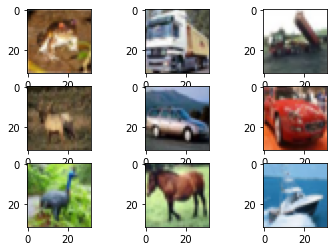

In [22]:
for i in range(0,9):
    plt.subplot(330+ 1 +i)
    
    plt.imshow(X_train[i])
    
plt.show()

# Prepocessing of Data

In [23]:
seed=6
np.random.seed(seed)

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#normalising inputs to 0.0 to 1.0 from 0-255
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

In [24]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


# Class labels exploration- 10 categories

In [25]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


# One hot encoding the categories

In [26]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_class=y_test.shape[1]

print(num_class)
print(y_train.shape)
print(y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Building the All CNN model referring to the paper

In [27]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

# defining the model function

In [28]:
def allcnn(weights=None):
    model=Sequential()
    #add model layers
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    #Softmax activation
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights
    
    if weights:
        model.load_weights(weights)
    
    return model

In [29]:
#define hyper parameters
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

#build model (hopefully)

model=allcnn()

#define optimizer and compile model

sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

print(model.summary())

#additional training params

epochs =9
batch_size=32

#fit model
model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=epochs,batch_size=batch_size,verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 192)      

In [30]:
classes=range(0,10)

names=['airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'auto', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [31]:
#generating batches for predictions
batch=X_test[100:109] #9 images
labels=np.argmax(y_test[100:109],axis=-1)

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 237ms/step


In [32]:
print(predictions)


[[5.29319746e-03 1.41928349e-05 6.50413483e-02 1.14793526e-02
  6.91827953e-01 2.55320519e-02 5.56448591e-04 1.99144199e-01
  6.78835378e-04 4.32402769e-04]
 [3.87032342e-04 1.48763202e-05 1.25038743e-01 1.15770742e-01
  6.92789676e-03 7.13303208e-01 2.49689147e-02 1.29886745e-02
  5.65026072e-04 3.48403846e-05]
 [3.39986174e-04 2.69560423e-03 3.09410710e-02 4.09450941e-02
  3.64228588e-04 3.66166495e-02 6.51547909e-01 2.34945551e-01
  1.33209024e-03 2.71840981e-04]
 [4.56171343e-04 5.23569179e-05 1.87524427e-02 7.11325824e-01
  3.93385300e-03 8.52875113e-02 1.75936252e-01 3.50183412e-03
  1.20483797e-04 6.33308198e-04]
 [2.31094248e-07 9.99980092e-01 3.11301955e-14 3.30900617e-13
  4.87395633e-14 1.61728744e-15 4.12061920e-15 1.04145002e-12
  8.95313335e-09 1.97164791e-05]
 [8.93347678e-05 9.99309063e-01 6.51440132e-07 4.78902450e-07
  1.12576473e-08 7.45160200e-09 7.21166202e-08 5.24071986e-08
  1.79749150e-05 5.82472479e-04]
 [1.17588267e-02 7.30191750e-05 3.98013830e-01 8.23593214e

In [33]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0000001
1.0000001
0.99999994
1.0


In [34]:
class_result=np.argmax(predictions, axis=1)
print(class_result)

[4 5 6 3 1 1 5 6 8]


# RESULT

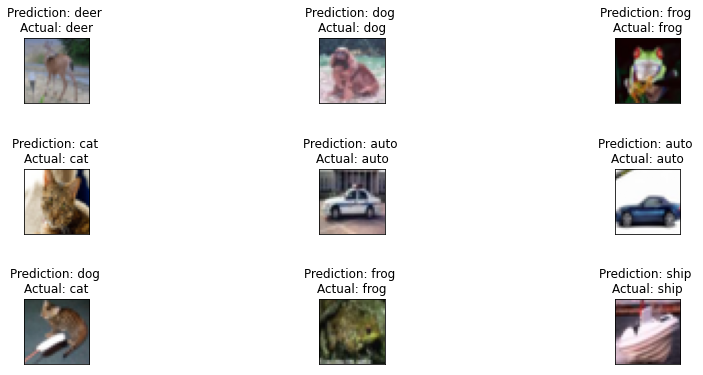

In [35]:
fig,axs=plt.subplots(3,3, figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
    for key,value in class_labels.items():
        if(class_result[i]==key):
            title='Prediction: {} \nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    
    axs[i].imshow(img)
    
plt.show()